## Simple Linear Regression


In [5]:
# Step 1: Import necessary libraries

import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

In [7]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [8]:
# Adding some random noise to salaries to reduce accuracy

noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [9]:
# Step 3: Create a linear Regression model
model=LinearRegression()

In [10]:
# Step 4: Train the model using the dataset
model.fit(X,Y) # the model learns the best-fit line by minimizing the error

LinearRegression()

In [27]:
# Step 5: Get the values of slope (m) and intercept (c) from the trained model

c = model.intercept_  # Intercept (where the line crosses the Y-axis)
m = model.coef_[0] # Coefficient (slope) of the regression line

print(f"Intercept: {c}")
print(f"Coefficients: {m}")

Intercept: 27.430065779800533
Coefficients: 4.965498141580592


In [28]:
# Step 6: Display the equation of the line
print(f"Equation of the line: y = {m:.2f}x + {c:.2f}")

Equation of the line: y = 4.97x + 27.43


In [29]:
# Step 7: Predict values using the model
y_pred = model.predict(X) #Predict salaries for the given experience values

In [30]:
# 1.Mean Squared Error (MSE) - Measures average squared difference between actual and predicted values
mse = mean_squared_error(Y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 11.75


In [31]:
# 2. Mean Absolute Error (MAE) - Measures average absolute difference between actual and predicted values
mae = mean_absolute_error(Y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.87


In [32]:
# 3. Root Mean Squared Error (RMSE) - Measures standard deviation of residuals (errors)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3.43


In [33]:
# 4. R-Squared (R^2) - Represents how well the model fits the data (0 to 1, Where 1 is best)
r2 = r2_score(Y, y_pred)
print(f"R-Squared (R^2): {r2:.2f}")

R-Squared (R^2): 0.95


In [36]:
# 5. Adjusted R-Squared (R^2_adj) - Adjusted for the number of predictors,better for multiple regression
n = len(Y)  # Number of observations
p = 1  # Number of independent Variables(Experience)
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R-Squared : {r2_adj:.2f}")

Adjusted R-Squared : 0.94


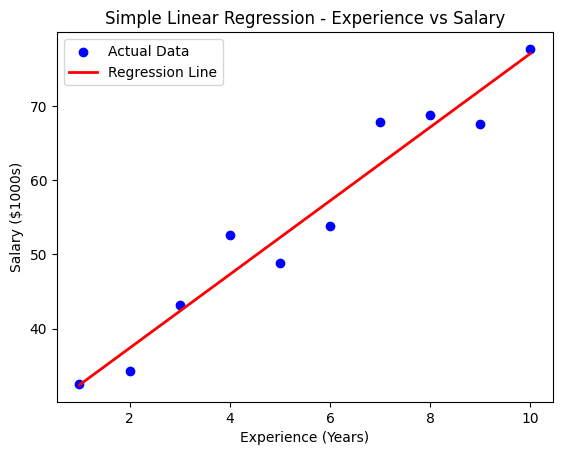

In [40]:
# 6. Plot the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data') #Scatter plot of actual values

# 7. Plot the Regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line') #Regression line

# 8. Add labels and legend
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($1000s)')
plt.title('Simple Linear Regression - Experience vs Salary')
plt.legend()

#9. Display the Graph
plt.show()

In [42]:
# User can input experience, and the model will predict salary

while True:
  try:
    exp= float(input("\nEnter years of experience to predict salary (or -1 to exit): "))
    if exp == -1:
      break
    predicted_salary = model.predict(np.array([[exp]]))[0]
    print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}k")
  except ValueError:
    print("Invalid input. Please enter a valid number.")



Enter years of experience to predict salary (or -1 to exit): 4
Predicted Salary for 4.0 years of experience: $47.29k

Enter years of experience to predict salary (or -1 to exit): 5
Predicted Salary for 5.0 years of experience: $52.26k

Enter years of experience to predict salary (or -1 to exit): -1


In [46]:
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
import statsmodels.api as sm  # For OLS Regression

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features


In [47]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression

X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        06:44:58   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()